# Method: L=sqrt(Dt)

In [66]:
import numpy as np

def mobility(T,L,time,kB = 1.38064852e-23,q = 1.60217662e-19):
    D = L**2/time
    mobility = D*q/(kB*T)
    return mobility,D
def mobility_cm2(T,L,time,kB = 1.38064852e-23,q = 1.60217662e-19):
    m,D = mobility(T,L,time,kB = kB,q = q)
    mobility_cm2=m*1e4
    D_cm2 = D*1e4
    return mobility_cm2,D_cm2

L_list = [5.2] # um
time_list = [1] # us
mobility_cm2_list = []
D_list = []
for L in L_list:
    for time in time_list:
        m,D = mobility_cm2(T= 273.15+20,L=L*1e-6,time=time*1e-6)
        mobility_cm2_list.append(m)
        D_list.append(D)
print('HTL mobility_cm2 max: ',np.max(mobility_cm2_list),'D max: ',np.max(D_list))
print('HTL mobility_cm2 min: ',np.min(mobility_cm2_list),'D min: ',np.min(D_list))


L_list = [2.7] # um
time_list = [10] # us
mobility_cm2_list = []
D_list = []
for L in L_list:
    for time in time_list:
        m,D = mobility_cm2(T= 273.15+20,L=L*1e-6,time=time*1e-6)
        mobility_cm2_list.append(m)
        D_list.append(D)
print('ETL mobility_cm2 max: ',np.max(mobility_cm2_list),'D_cm2 max: ',np.max(D_list))
print('ETL mobility_cm2 min: ',np.min(mobility_cm2_list),'D_cm2 min: ',np.min(D_list))

HTL mobility_cm2 max:  10.703949389614985 D max:  0.27040000000000003
HTL mobility_cm2 min:  10.703949389614985 D min:  0.27040000000000003
ETL mobility_cm2 max:  0.2885791089138064 D_cm2 max:  0.0072900000000000005
ETL mobility_cm2 min:  0.2885791089138064 D_cm2 min:  0.0072900000000000005


# Method: solving diffusion equation

## configuration

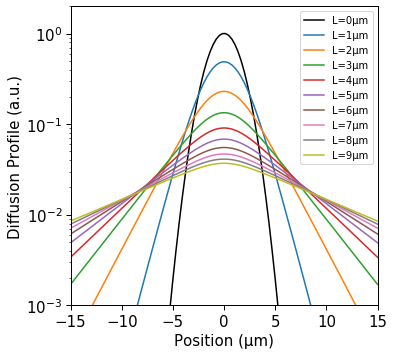

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', linewidth=1)
plt.rc('xtick.major',size=5,width=1)
plt.rc('ytick.major',size=5,width=1)

def diffusion_map(L,w0,pos_max=25,point_num=100,A=1):
    l = np.linspace(-pos_max,pos_max,point_num); 
    unit_length = 2*pos_max/point_num
    num = len(l);  # number of pixels in one dimension
    [xx, yy] = np.meshgrid(l,l);
    R = np.sqrt(xx**2 + yy**2);  # distance matrix
    N = A * np.exp(-2*R**2/w0**2);  # Gaussian beam Nin
    z = np.zeros((num, num));   # initialize sum resuot
    middle = round(num/2);
    for  i in range(middle):
        for j in range(middle):
            x = xx[i,j];
            y = yy[i,j];        
            # Nin = A * np.exp(-2*R(i,j)^2/w0^2);
            Nin = N[i,j];
            r = np.sqrt((xx - x)**2 + (yy - y)**2);
            Nr3 = Nin * unit_length **2 / (2 * np.pi * L**2) * np.exp(-r / L);   # Quadrant III
            Nr1 = Nr3[::-1,::-1];  # Quadrant I
            Nr2 = Nr3[::-1,:];  # Quadrnat III
            Nr4 = Nr3[:,::-1];
            if x == 0 and  y == 0:
                z = z + Nr3;
            elif x == 0:
                z = z + Nr3 + Nr2;
            elif y == 0:
                z = z + Nr3 + Nr4;
            else:
                z = z + Nr1 + Nr2 + Nr3 + Nr4;
    return xx,yy,z

L_list = []
max_list = []
buffer = []

plt.figure(figsize=(5.5,5.5))
L = 1e-100
xx,yy,z = diffusion_map(L,2*np.sqrt(2),point_num=100,pos_max=15)
L_list.append(L)
x_axis_fit = xx[0]
total = np.sum(z)
z/=total
z_axis_fit = z[round(z.shape[0]/2)]
z0 = np.max(z_axis_fit)#or np.max(z). They are the same
max_list.append(np.max(z_axis_fit)/z0)

plt.plot(x_axis_fit,z_axis_fit/z0,label='L={}μm'.format(int(L)),color='black')
buffer.append(z_axis_fit/z0)
step = 1
for L in tqdm(np.arange(step,10,step)):
    L_list.append(L)
    xx,yy,z = diffusion_map(L,2*np.sqrt(2),point_num=100,pos_max=15)
    x_axis_fit = xx[0]
    total = np.sum(z)
    z/=total
    z_axis_fit = z[round(z.shape[0]/2)]
    max_list.append(np.max(z_axis_fit)/z0)
    plt.plot(x_axis_fit,z_axis_fit/z0,label='L={}μm'.format(L))
    buffer.append(z_axis_fit/z0)
plt.yscale('log')
plt.xlim(-15,15)
plt.ylim(1e-3,2)
plt.xlabel('Position (μm)')
plt.ylabel('Diffusion Profile (a.u.)')
plt.legend()

## calculation

HTL mu_slope =  6.884510626664048
HTL n_c: [3.89267664e+14 1.16780299e+15 3.11414131e+15 7.78535329e+15
 1.94633832e+16 3.89267664e+16]
HTL mu_individuals: [58.686774777224684, 39.679499788804506, 26.86660427249302, 19.206558868904274, 12.694479870921228, 7.546559880871249]
----------------------------------------------------------------------------------------------------
ETL mu_slope =  0.3180681961725889
ETL n_c: [9.62799318e+15 2.88839796e+16 7.70239455e+16 1.92559864e+17
 4.81399659e+17 9.62799318e+17]
ETL mu_individuals: [0.7521509894773792, 0.567026398410171, 0.5475017477725429, 0.37382273816854306, 0.28564200749406116, 0.3349411368356505]


(0, 1)

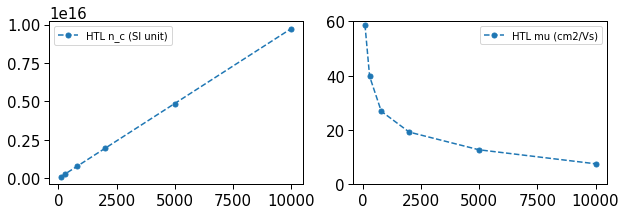

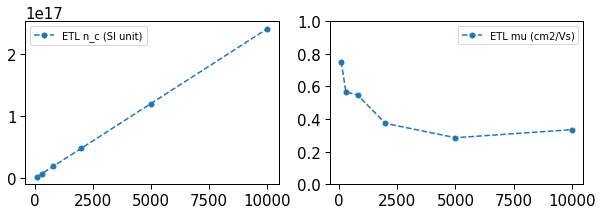

In [68]:
power_list=[100,300,800,2000,5000,10000]
HTL_list=[0.366015069,0.742414023,1.340483549,2.395732257,3.958618397,4.706604931]
ETL_list=[0.116024899,0.262404151,0.675649819,1.1532989,2.203120486,5.166716805]

# plt.plot(L_list,max_list)

##########
#CONSTANTS:
ipce=0.66
h=6.62607004e-34
c=299792458
q=1.602176634e-19
wavelength=446e-9
thn=250e-9
##########
#PARAMETERS:
HTL_L_target = 5.2 #um
HTL_time = 1e-6 #s

ETL_L_target = 2.7 #um
ETL_time = 10e-6 #s
##########

def mobility_slope(slope,time,wavelength,coeff,h=h,q=q,c=c,thn=thn,ipce=ipce):
    v=c/wavelength
    return h*v*slope*thn/(coeff*ipce*time*q)

def mobility_slope_cm2(slope,time,wavelength,coeff,thn=thn,ipce=ipce):
    return 1e4*mobility_slope(slope,time,wavelength,coeff,h=h,q=q,c=c,thn=thn,ipce=ipce)

def get_nc(sigma,Pc,coeff,time,c=c,wavelength=wavelength,ipce=ipce,h=h):
    v=c/wavelength
    nc = coeff*ipce*Pc*time/(h*v)
    return nc

def mobility_individual(sigma,Pc,coeff,time):
    nc = get_nc(sigma,Pc,coeff,time,c=c,wavelength=wavelength,ipce=ipce,h=h)
    return sigma*thn/nc/q

def mobility_individual_cm2(sigma,Pc,coeff,time):
    return mobility_individual(sigma,Pc,coeff,time)*1e4
# v=c/wavelength


########################
# HTL:
HTL_coeff = np.interp(HTL_L_target,L_list,max_list)
HTL_slope_raw = np.polyfit(power_list,HTL_list,1)[0]
HTL_slope = HTL_slope_raw*0.1 #unit conversion to SI

print('HTL mu_slope = ',mobility_slope_cm2(HTL_slope,HTL_time,wavelength,HTL_coeff))
HTL_nc_list = []
HTL_mobility_individual_list = []
for sigma,Pc in zip(HTL_list,power_list):
    Pc_SI = Pc*10
    HTL_nc_list.append(get_nc(sigma,Pc_SI,HTL_coeff,HTL_time))
    HTL_mobility_individual_list.append(mobility_individual_cm2(sigma,Pc_SI,HTL_coeff,HTL_time))
np.set_printoptions(suppress=True)
print('HTL n_c:',np.array(HTL_nc_list)/thn/1e6)
print('HTL mu_individuals:',HTL_mobility_individual_list)
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(power_list,HTL_nc_list,'.--',markersize=10,label='HTL n_c (SI unit)')
plt.legend()
plt.subplot(1,2,2)
plt.plot(power_list,HTL_mobility_individual_list,'.--',markersize=10,label='HTL mu (cm2/Vs)')
plt.legend()
plt.ylim(0,60)

print('-'*100)
#########################
# ETL
ETL_coeff = np.interp(ETL_L_target,L_list,max_list)
ETL_slope_raw = np.polyfit(power_list,ETL_list,1)[0]
ETL_slope = ETL_slope_raw*0.1 #unit conversion to SI

print('ETL mu_slope = ',mobility_slope_cm2(ETL_slope,ETL_time,wavelength,ETL_coeff))
ETL_nc_list = []
ETL_mobility_individual_list = []
for sigma,Pc in zip(ETL_list,power_list):
    Pc_SI = Pc*10
    ETL_nc_list.append(get_nc(sigma,Pc_SI,ETL_coeff,ETL_time))
    ETL_mobility_individual_list.append(mobility_individual_cm2(sigma,Pc_SI,ETL_coeff,ETL_time))
np.set_printoptions(suppress=True)
print('ETL n_c:',np.array(ETL_nc_list)/thn/1e6)
print('ETL mu_individuals:',ETL_mobility_individual_list)
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(power_list,ETL_nc_list,'.--',markersize=10,label='ETL n_c (SI unit)')
plt.legend()
plt.subplot(1,2,2)
plt.plot(power_list,ETL_mobility_individual_list,'.--',markersize=10,label='ETL mu (cm2/Vs)')
plt.legend()
plt.ylim(0,1)

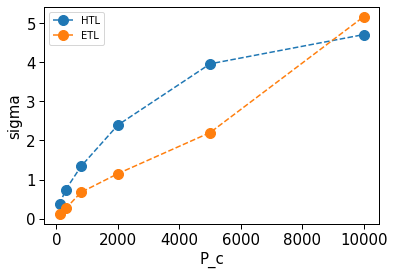

In [51]:
plt.plot(power_list,HTL_list,'.--',markersize=20,label='HTL')
plt.plot(power_list,ETL_list,'.--',markersize=20,label='ETL')
plt.xlabel('P_c')
plt.ylabel('sigma')
plt.legend()

## n_c values in cm-3

In [75]:
np.round(np.array(HTL_nc_list)/thn/1e6)

array([4.25770013e+13, 1.27731004e+14, 3.40616011e+14, 8.51540026e+14,
       2.12885007e+15, 4.25770013e+15])

In [79]:
np.round(np.array(ETL_nc_list)/thn/1e6)

array([1.14720375e+15, 3.44161126e+15, 9.17763003e+15, 2.29440751e+16,
       5.73601877e+16, 1.14720375e+17])

In [38]:
HTL_coeff

0.06567291125876185

In [63]:
np.set_printoptions(suppress=True)
ipce=0.66
Pc=100*10
tau=1e-6
thickness=250e-9
h=6.62607004e-34
v=299792458/446e-9
coeff = 0.066

print(np.array([ipce*coeff*Pc*tau/(h*v)])/thickness/1e6)

[3.9120644e+14]


In [54]:
v=c/wavelength
nc = HTL_coeff*Pc*tau/(h*v)
nc/thickness

5.897994914333029e+20